In [ ]:
import os
import numpy as np
import pandas as pd
from shutil import copyfile

In [ ]:
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d shanks0465/braille-character-dataset

In [ ]:
!unzip braille-character-dataset.zip -d braille_dataset

In [ ]:
# !rm -r ./images

In [ ]:
import os
from shutil import copyfile

# Create the 'images' directory
os.mkdir('./images/')

# Create subdirectories for each letter (a to z)
alpha = 'a'
for i in range(26):
    os.mkdir('./images/' + alpha)
    alpha = chr(ord(alpha) + 1)

# Define the root directory of the downloaded dataset
rootdir = '/content/braille_dataset/Braille Dataset/Braille Dataset/'

# Copy files to the corresponding directories
for file in os.listdir(rootdir):
    letter = file[0].lower()
    copyfile(os.path.join(rootdir, file), './images/' + letter + '/' + file)

In [ ]:
!pip install keras
!pip install tensorflow

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=20,
                             shear_range=10,
                             validation_split=0.2)

train_generator = datagen.flow_from_directory('./images/',
                                              target_size=(28,28),
                                              subset='training')

val_generator = datagen.flow_from_directory('./images/',
                                            target_size=(28,28),
                                            subset='validation')

In [ ]:
from keras import backend as K
from keras import layers as L
from keras.models import Model,load_model
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping

K.clear_session()

model_ckpt = ModelCheckpoint('BrailleNet.keras',save_best_only=True)
reduce_lr = ReduceLROnPlateau(patience=8,verbose=0)
early_stop = EarlyStopping(patience=15,verbose=1)

entry = L.Input(shape=(28,28,3))
x = L.SeparableConv2D(64,(3,3),activation='relu')(entry)
x = L.MaxPooling2D((2,2))(x)
x = L.SeparableConv2D(128,(3,3),activation='relu')(x)
x = L.MaxPooling2D((2,2))(x)
x = L.SeparableConv2D(256,(2,2),activation='relu')(x)
x = L.GlobalMaxPooling2D()(x)
x = L.Dense(256)(x)
x = L.LeakyReLU()(x)
x = L.Dense(64,kernel_regularizer=l2(2e-4))(x)
x = L.LeakyReLU()(x)
x = L.Dense(26,activation='softmax')(x)

model = Model(entry,x)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=666,
    callbacks=[model_ckpt, reduce_lr, early_stop],
    verbose=1
)


Epoch 1/666


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.0405 - loss: 3.3441 - val_accuracy: 0.0385 - val_loss: 3.2627 - learning_rate: 0.0010
Epoch 2/666
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.0317 - loss: 3.2421 - val_accuracy: 0.1314 - val_loss: 3.0901 - learning_rate: 0.0010
Epoch 3/666
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.1185 - loss: 3.0532 - val_accuracy: 0.1923 - val_loss: 2.6882 - learning_rate: 0.0010
Epoch 4/666
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.2160 - loss: 2.6709 - val_accuracy: 0.3365 - val_loss: 2.2172 - learning_rate: 0.0010
Epoch 5/666
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.3938 - loss: 2.1527 - val_accuracy: 0.5128 - val_loss: 1.7435 - learning_rate: 0.0010
Epoch 6/666
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.4991 - loss: 1.7335 - val_accuracy: 0.5577 - val_loss: 1.4808 - learning_rate: 0.0010
Epoch 7/666
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.6107 - loss: 1.3173 - val_accurac

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d (SeparableConv2D)   │ (None, 26, 26, 64)          │             283 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_1 (SeparableConv2D) │ (None, 11, 11, 128)         │           8,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_2 (SeparableConv2D) │ (None, 4, 4, 256)           │          33,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 256)                 │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 26)                  │           1,690 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 379,937 (1.45 MB)

 Trainable params: 126,645 (494.71 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 253,292 (989.43 KB)

In [ ]:
model = load_model('BrailleNet.keras')

loss, acc = model.evaluate(val_generator)
print('Model accuracy: {}'.format(round(acc, 4)))

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9425 - loss: 0.2659
Model accuracy: 0.9423


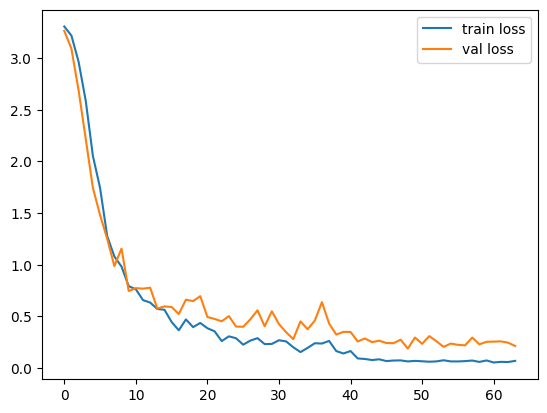

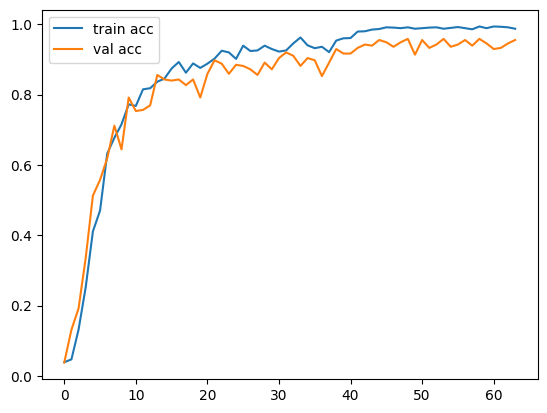

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
pred = model.predict(val_generator)
pred

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


array([[1.5260823e-15, 4.8989591e-19, 9.2016193e-17, ..., 1.8872722e-12,
        2.4335619e-11, 1.6759559e-05],
       [7.1513060e-21, 1.5349151e-24, 4.9356115e-27, ..., 2.0706904e-07,
        9.9744499e-01, 7.1091827e-11],
       [1.0125398e-07, 2.4161278e-07, 1.7517884e-08, ..., 3.2905033e-12,
        7.6699199e-16, 6.1924698e-07],
       ...,
       [4.7204571e-06, 1.3915525e-03, 1.5044102e-07, ..., 7.9484994e-07,
        5.4198817e-06, 1.2324904e-06],
       [1.7237641e-06, 3.9488955e-07, 8.7228422e-05, ..., 5.2526966e-13,
        6.3001953e-13, 5.0891919e-07],
       [2.4023456e-30, 1.3962372e-32, 8.6763357e-36, ..., 2.1123573e-11,
        9.9999601e-01, 8.1085822e-13]], dtype=float32)

In [ ]:
from tensorflow.keras.preprocessing import image

# Load the image
img_path = '/content/braille_dataset/Braille Dataset/Braille Dataset/k1.JPG14whs.jpg'  # Adjust the file name as needed
img = image.load_img(img_path, target_size=(28, 28))  # Resize if necessary

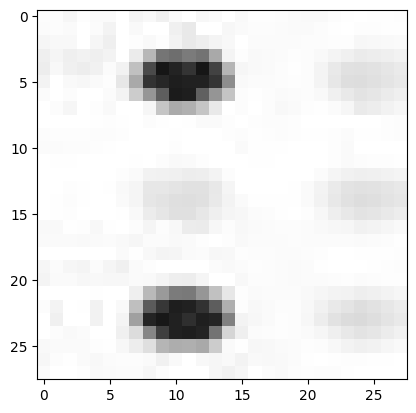

In [ ]:
plt.imshow(img)

In [ ]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [246., 246., 246.],
        ...,
        [254., 254., 254.],
        [254., 254., 254.],
        [253., 253., 253.]],

       [[251., 251., 251.],
        [252., 252., 252.],
        [250., 250., 250.],
        ...,
        [253., 253., 253.],
        [254., 254., 254.],
        [254., 254., 254.]],

       [[246., 246., 246.],
        [248., 248., 248.],
        [248., 248., 248.],
        ...,
        [248., 248., 248.],
        [249., 249., 249.],
        [250., 250., 250.]],

       ...,

       [[249., 249., 249.],
        [250., 250., 250.],
        [250., 250., 250.],
        ...,
        [242., 242., 242.],
        [246., 246., 246.],
        [249., 249., 249.]],

       [[247., 247., 247.],
        [252., 252., 252.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [254., 254., 254.],
        [255., 255., 255.]],

       [[251., 251., 251.],
        [255., 255., 255.],
        [255., 2

In [ ]:
x.shape

(28, 28, 3)

In [ ]:
x=np.expand_dims(x,axis=0)
model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


array([[2.0767488e-05, 2.3982457e-13, 2.0157007e-07, 1.4361808e-16,
        1.3086386e-04, 2.4113340e-15, 1.0191171e-21, 1.7392768e-17,
        1.6644202e-05, 1.3100939e-16, 9.9975187e-01, 3.0074600e-17,
        5.2056168e-11, 1.8052788e-08, 1.8195600e-05, 9.2040525e-12,
        3.5401731e-29, 2.8937608e-15, 2.2383886e-06, 3.7807570e-17,
        5.9101745e-05, 7.0546562e-18, 3.3595806e-27, 7.0105410e-10,
        2.6260729e-20, 1.2946856e-08]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(x), axis=1)
a

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([10])

In [ ]:
alphabet = 'abcdefghijklmnopqrstuvwxyz'
predicted_letter = alphabet[a[0]]

print('Predicted letter:', predicted_letter)

Predicted letter: k


In [ ]:
import cv2
import numpy as np

def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
    return binary_image

binary_image = preprocess_image('/content/Grade-2-Braille-Example.jpg')


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
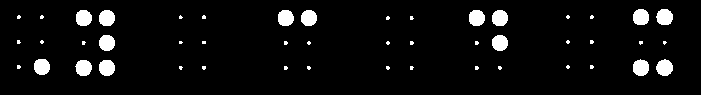

In [ ]:
binary_image

## In Progress.................
